In [1]:
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import os
import sys
from pathlib import Path

cwd = os.getcwd()
# print(f"Working dir: {cwd}")
module_path = os.path.abspath(Path(cwd).parents[1])
# print(f"Module dir: {module_path}")
if module_path not in sys.path:
    sys.path.append(module_path)
    
sns.set(font_scale=1.2)
sns.set_palette("Set2")

In [2]:
import matplotlib.pyplot as plt

SMALL_SIZE = 16
MEDIUM_SIZE = 18
BIGGER_SIZE = 20

plt.rc('font', size=SMALL_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=SMALL_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=MEDIUM_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=SMALL_SIZE)    # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title

In [3]:
# stardist trained on raw
df_pred = pd.read_csv(os.path.join(module_path, "experiments", "exp11", "results_defaults", "reg_props", "all.csv"))

In [4]:
df_pred.dropna(subset=['centroid_x'], inplace=True)
# df_pred.reset_index()

In [6]:
pred_cell_counts = df_pred["actual_frame"].value_counts()
pred_cell_counts = pd.DataFrame(pred_cell_counts.sort_values())
pred_cell_counts

,actual_frame
8,4
62,4
31,4
51,4
73,4
24,4
66,4
67,4
58,4
81,6


In [7]:
pred_cell_counts["actual_frame"].index

Int64Index([  8,  62,  31,  51,  73,  24,  66,  67,  58,  81,  91, 177, 106,
            128, 174, 152, 148, 192, 275, 251, 259, 260, 264, 282, 211, 242,
            266, 241, 284, 279, 267, 294, 309, 330, 344],
           dtype='int64')

In [8]:
df = pd.read_csv(os.path.join(module_path, "data", "pos14_original", "labels_matched_00", "isotropic", "reg_props_isotropic", "all.csv"))
# pd.set_option('display.max_rows', df.shape[0]+1)
# df

In [9]:
lst = set(pred_cell_counts["actual_frame"].index)

In [10]:
gt_df = df.query('Frame in @lst')
# gt_df

In [11]:
gt_df.dropna(subset=['centroid_x'], inplace=True)
# gt_df.reset_index()

C:\Users\lazi257c\AppData\Local\Temp\ipykernel_20412\2460720997.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  gt_df.dropna(subset=['centroid_x'], inplace=True)


In [12]:
gt_cell_counts = gt_df["Frame"].value_counts()
gt_cell_counts = pd.DataFrame(gt_cell_counts.sort_values())
gt_cell_counts

,Frame
8,4
62,4
31,4
51,4
73,4
24,4
66,4
67,4
58,4
81,6


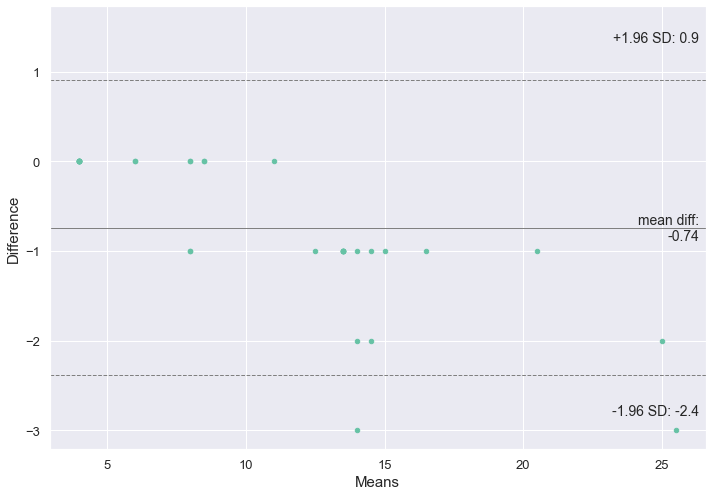

In [13]:
#create Bland-Altman plot                  
f, ax = plt.subplots(1, figsize = (10,7))
sm.graphics.mean_diff_plot(gt_cell_counts.Frame, pred_cell_counts.actual_frame, ax = ax)

#display Bland-Altman plot
plt.show()